In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
##Reading the Dataset
base_data = pd.read_csv('Data.csv')

In [3]:
base_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
base_data.shape

(110527, 14)

In [8]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
##modifying the date and time into standard form
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [10]:
base_data.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


for the ScheduleDay and AppointmentDay storing the weekdays only into a variable

In [13]:
# 5 is Saturday, 6 is Sunday 

base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [14]:
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [15]:
base_data['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [16]:
base_data['app_weekday'].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [17]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [19]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [20]:
##Dropping columns which have no significance
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [21]:
base_data

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,4,4
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,4,4
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,4,4
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,4,4
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,1,1
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,1,1
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,2,1
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,2,1


In [22]:
base_data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


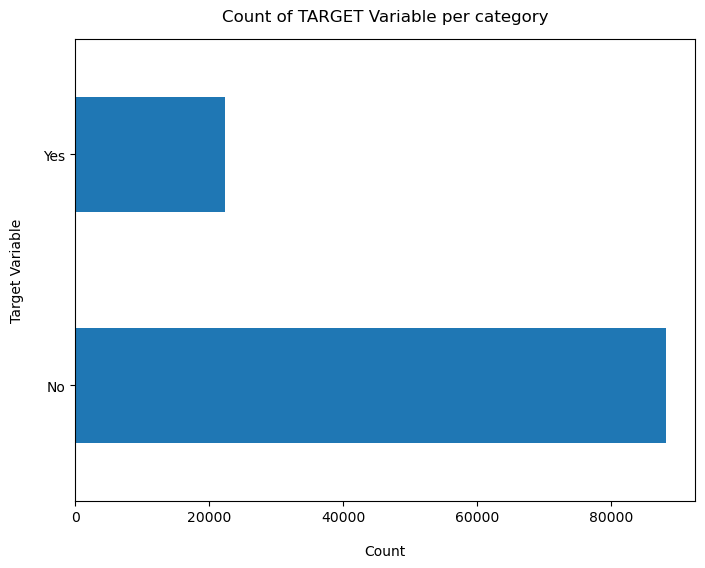

In [28]:
base_data['No-show'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)
plt.show()

In [29]:
## calculating the % of appointments or not 
100*base_data['No-show'].value_counts()/len(base_data['No-show'])

No-show
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [30]:
base_data['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [32]:
print(missing)

             index    0
0           Gender  0.0
1     ScheduledDay  0.0
2   AppointmentDay  0.0
3              Age  0.0
4      Scholarship  0.0
5     Hipertension  0.0
6         Diabetes  0.0
7       Alcoholism  0.0
8          Handcap  0.0
9     SMS_received  0.0
10         No-show  0.0
11     sch_weekday  0.0
12     app_weekday  0.0


<Figure size 1600x500 with 0 Axes>

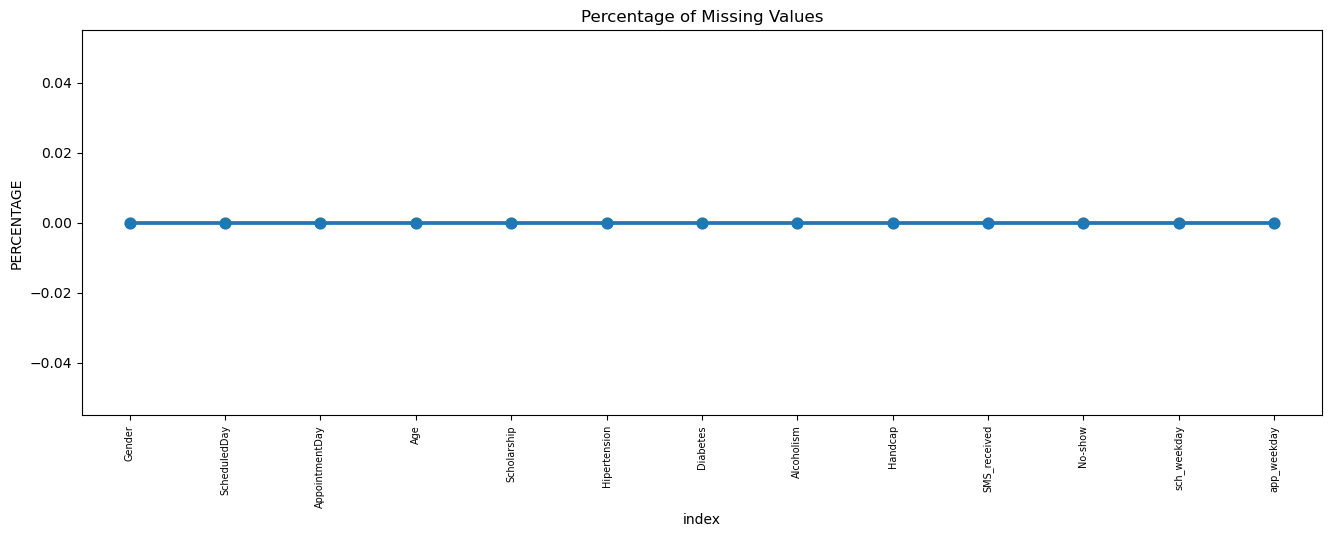

In [33]:
# Calculate percentage of missing values
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
missing.columns = ['index', 'Percentage']

# Create the point plot
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

Data Cleaning

In [35]:
new_data = base_data.copy()

In [36]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hipertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handcap         110527 non-null  int64         
 9   SMS_received    110527 non-null  int64         
 10  No-show         110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [37]:
# Get the max tenure
print(base_data['Age'].max())

115


In [38]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [39]:
base_data.drop(['Age'], axis=1, inplace=True)

Data Exploration

In [41]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show',
 'sch_weekday',
 'app_weekday',
 'Age_group']

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64


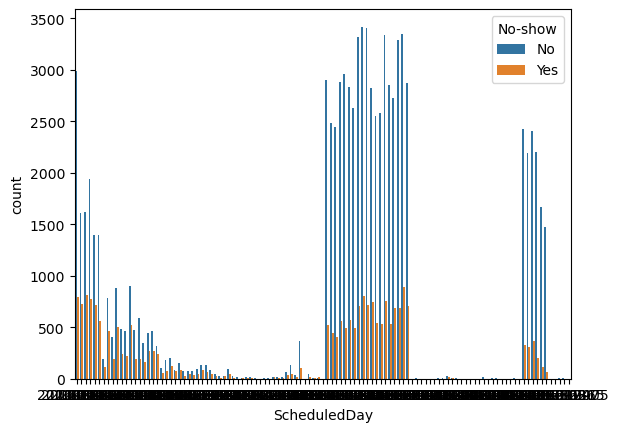

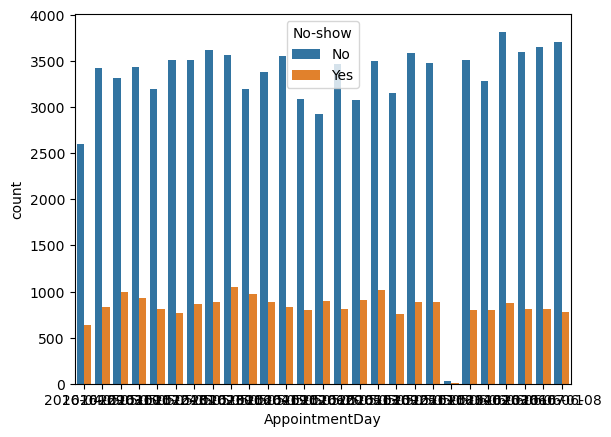

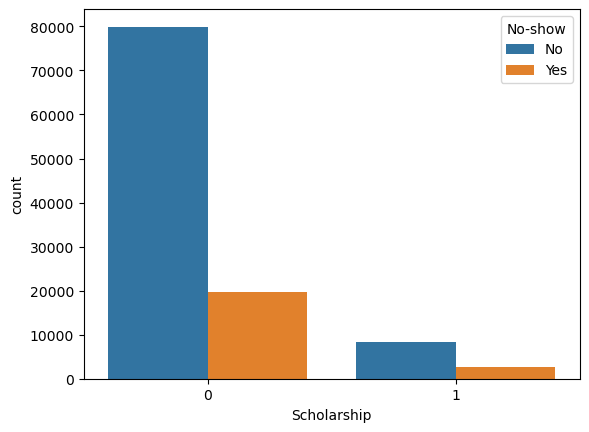

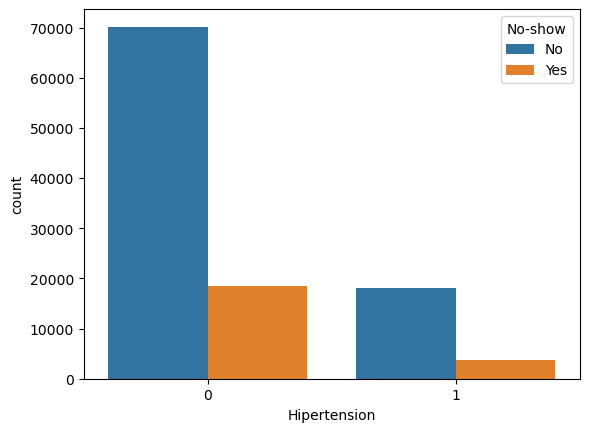

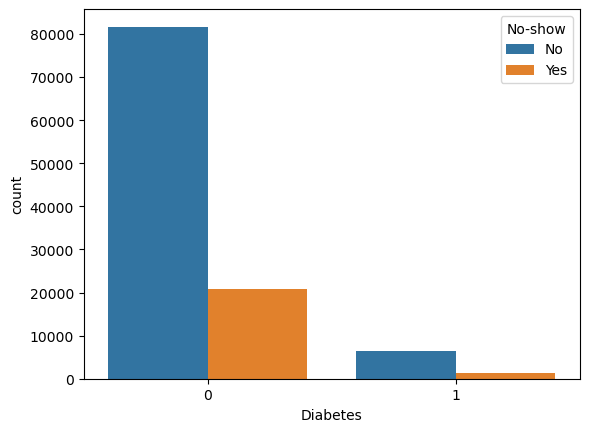

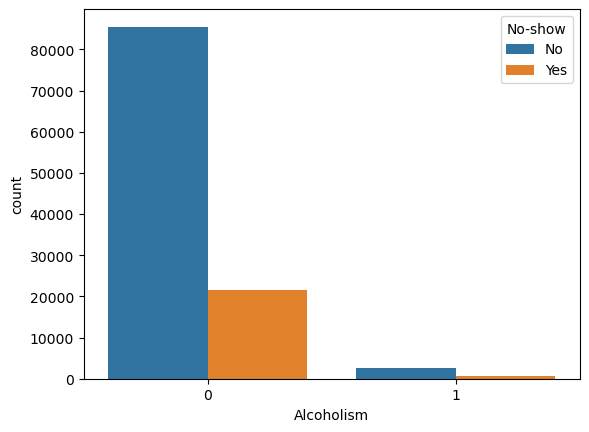

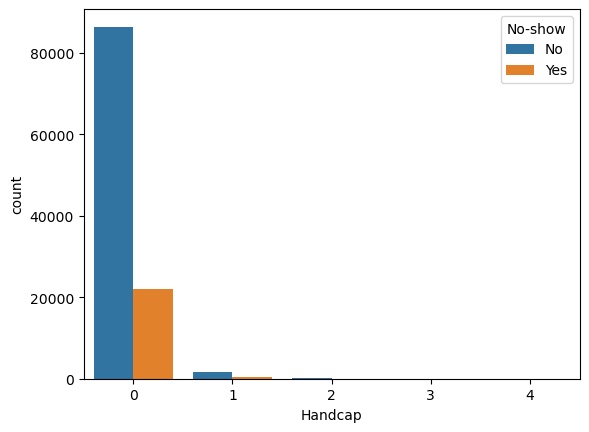

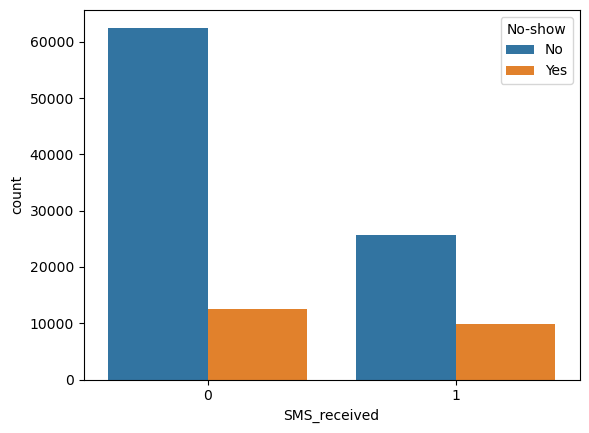

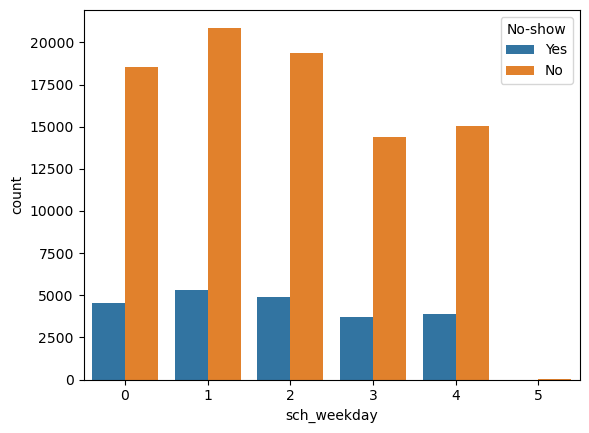

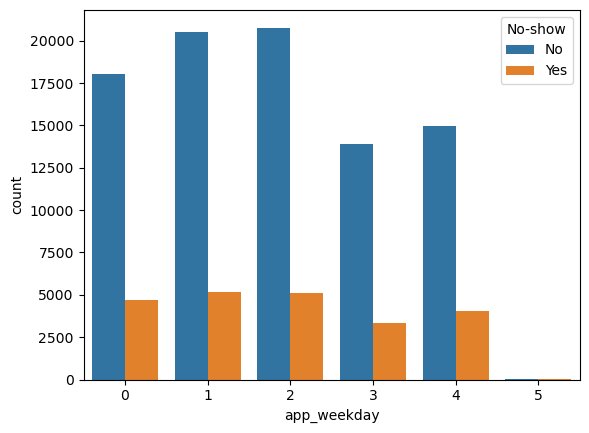

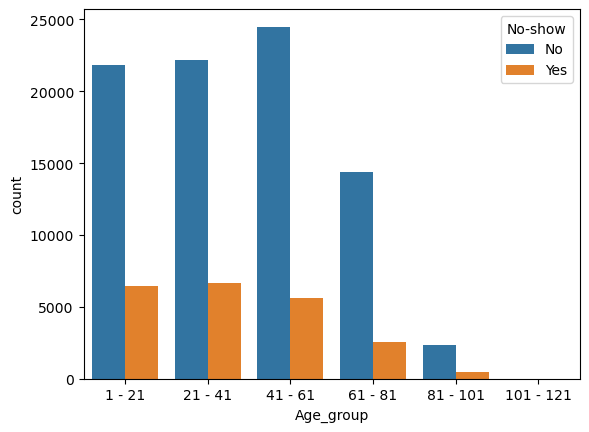

<Figure size 2000x800 with 0 Axes>

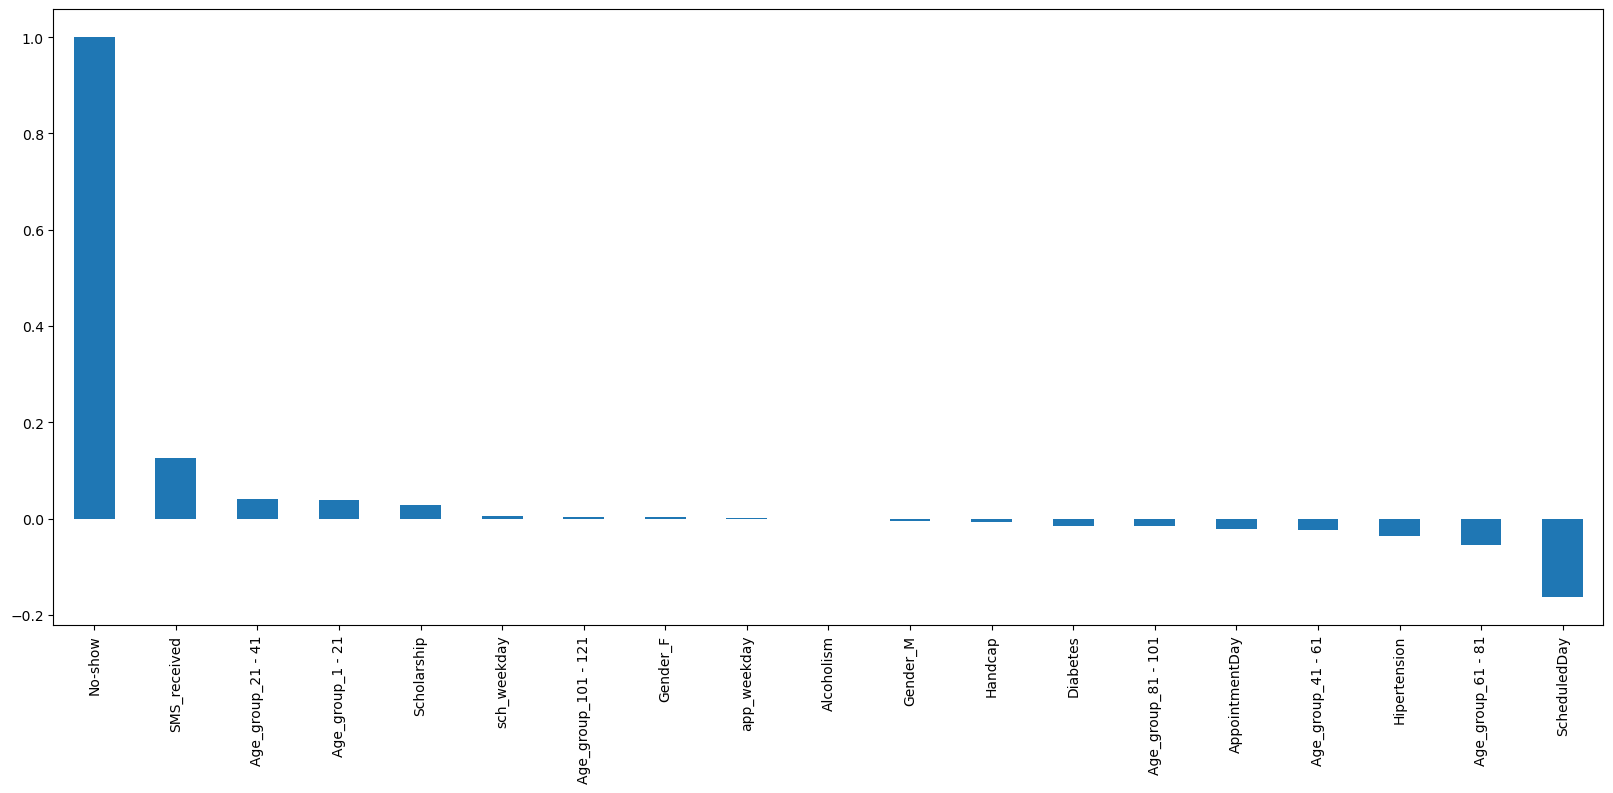

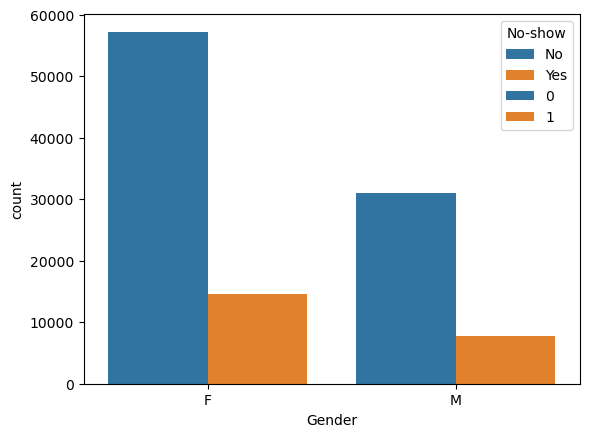

---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-01-27       1
2016-01-19       1
2016-06-04       1
2016-01-26       1
2016-03-05       1
Name: count, Length: 111, dtype: int64


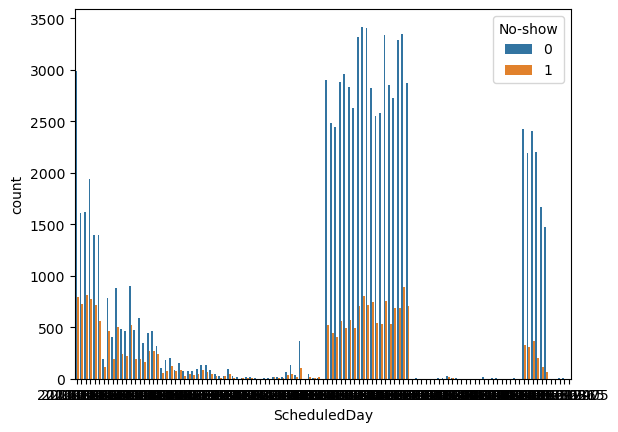

---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64


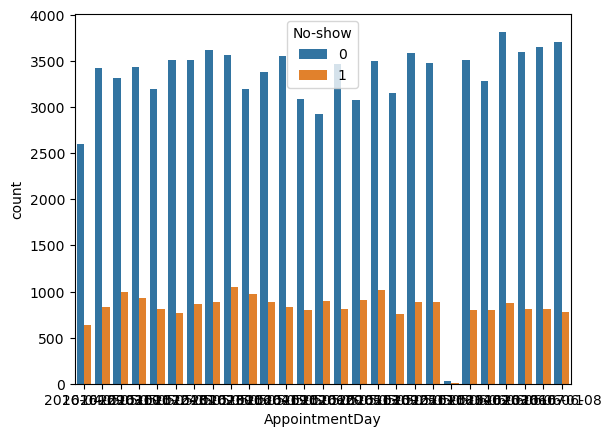

---------- Scholarship ----------
Scholarship
0    99666
1    10861
Name: count, dtype: int64


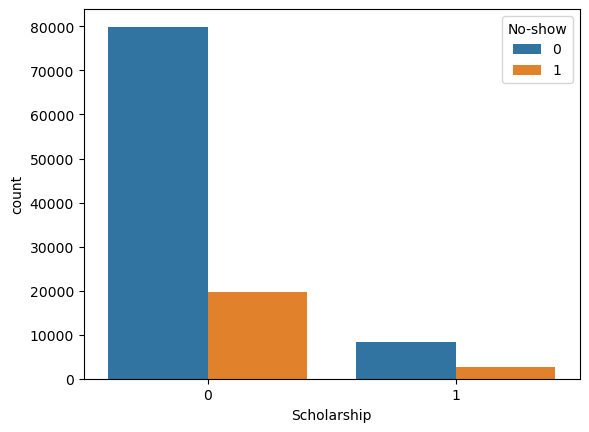

---------- Hipertension ----------
Hipertension
0    88726
1    21801
Name: count, dtype: int64


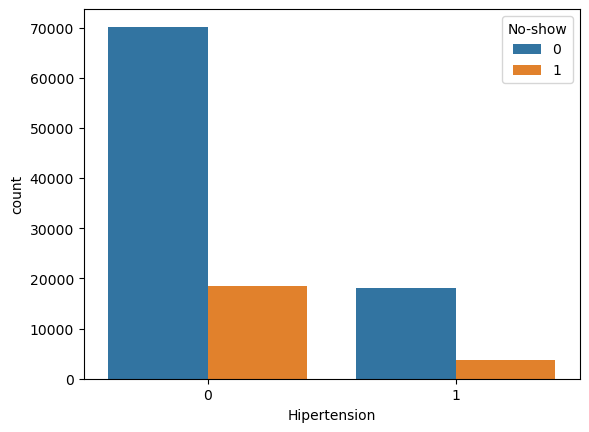

---------- Diabetes ----------
Diabetes
0    102584
1      7943
Name: count, dtype: int64


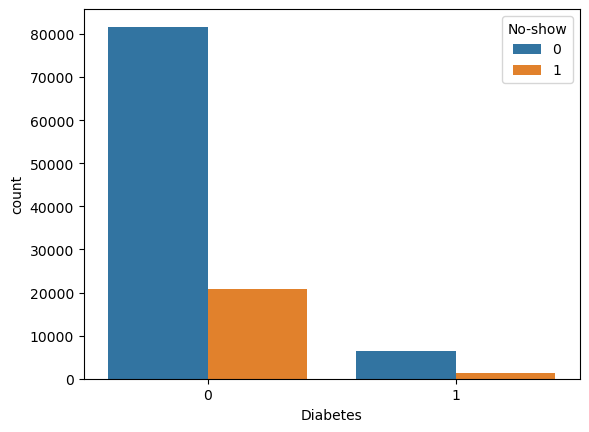

---------- Alcoholism ----------
Alcoholism
0    107167
1      3360
Name: count, dtype: int64


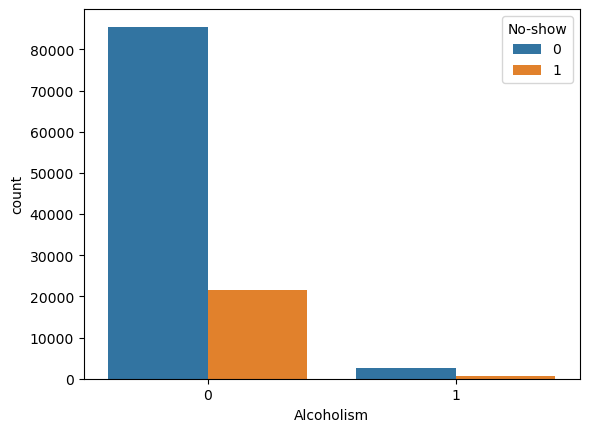

---------- Handcap ----------
Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64


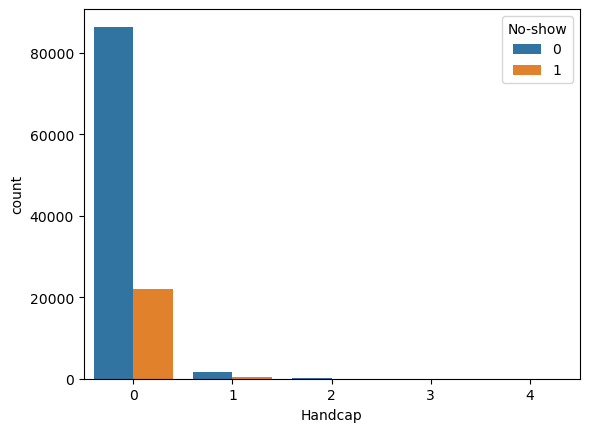

---------- SMS_received ----------
SMS_received
0    75045
1    35482
Name: count, dtype: int64


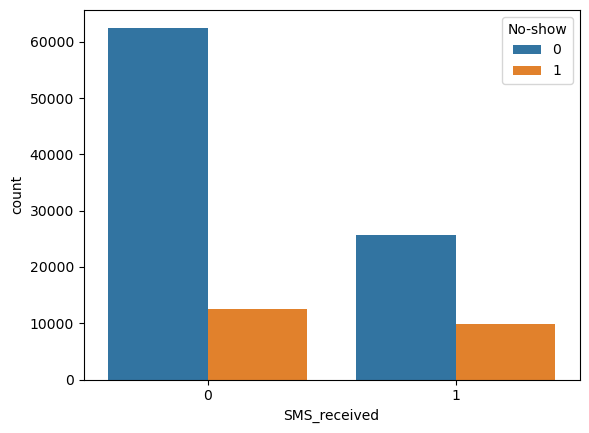

---------- sch_weekday ----------
sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64


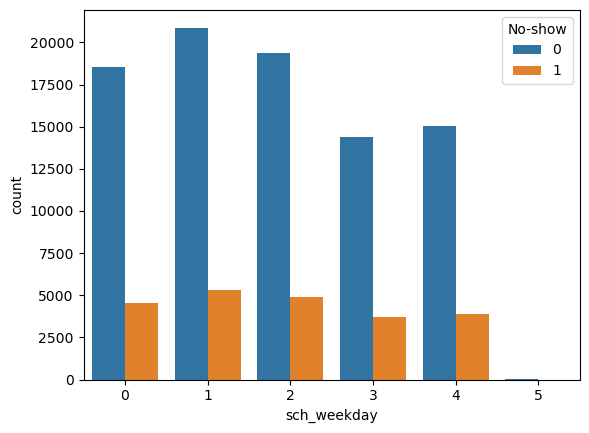

---------- app_weekday ----------
app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64


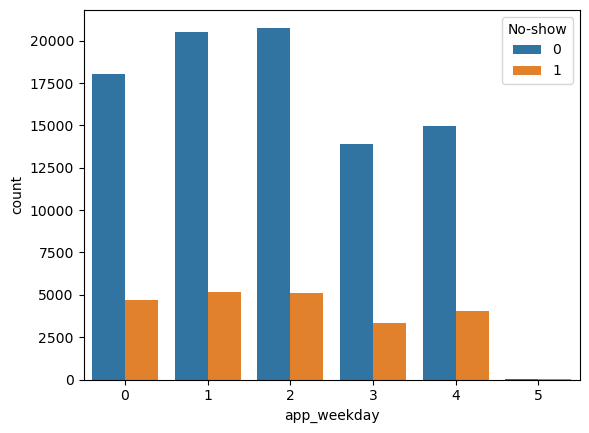

---------- Age_group ----------
Age_group
41 - 61      30081
21 - 41      28835
1 - 21       28309
61 - 81      16910
81 - 101      2845
101 - 121        7
Name: count, dtype: int64


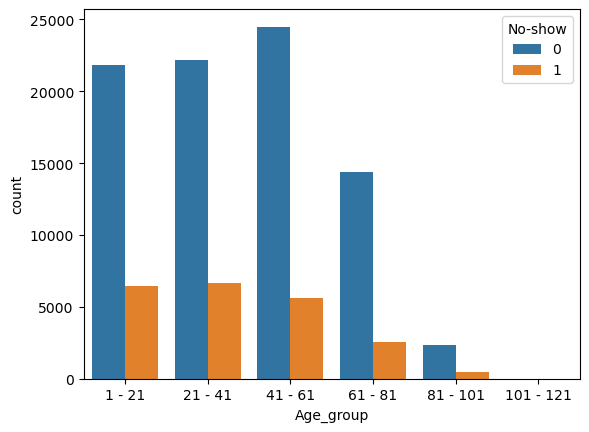

In [52]:
###Having a loook into the values of count of each columns and the count in respect to No-show column
for i, predictor in enumerate(base_data.drop(columns=['No-show'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='No-show')
    plt.show()

In [46]:
base_data['No-show'] = np.where(base_data['No-show'] == 'Yes', 1, 0)

In [47]:
base_data['No-show'].value_counts()

No-show
0    88208
1    22319
Name: count, dtype: int64

Convert all the categorical variables into dummy variables

In [49]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


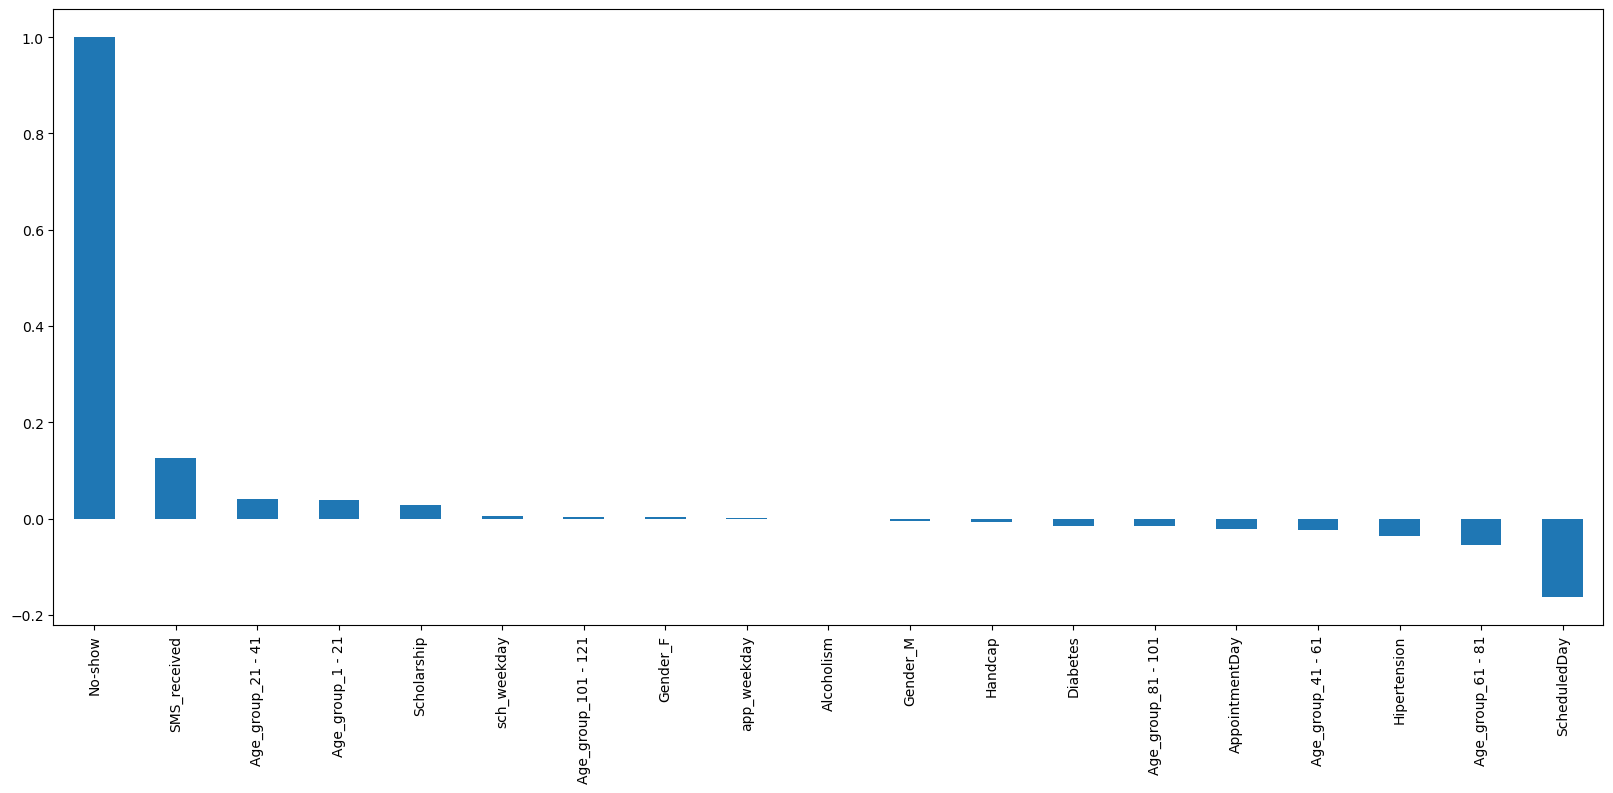

In [53]:
##Build a corelation of all predictors with 'No-show'
plt.figure(figsize=(20,8))
base_data_dummies.corr()['No-show'].sort_values(ascending = False).plot(kind='bar')
plt.show()

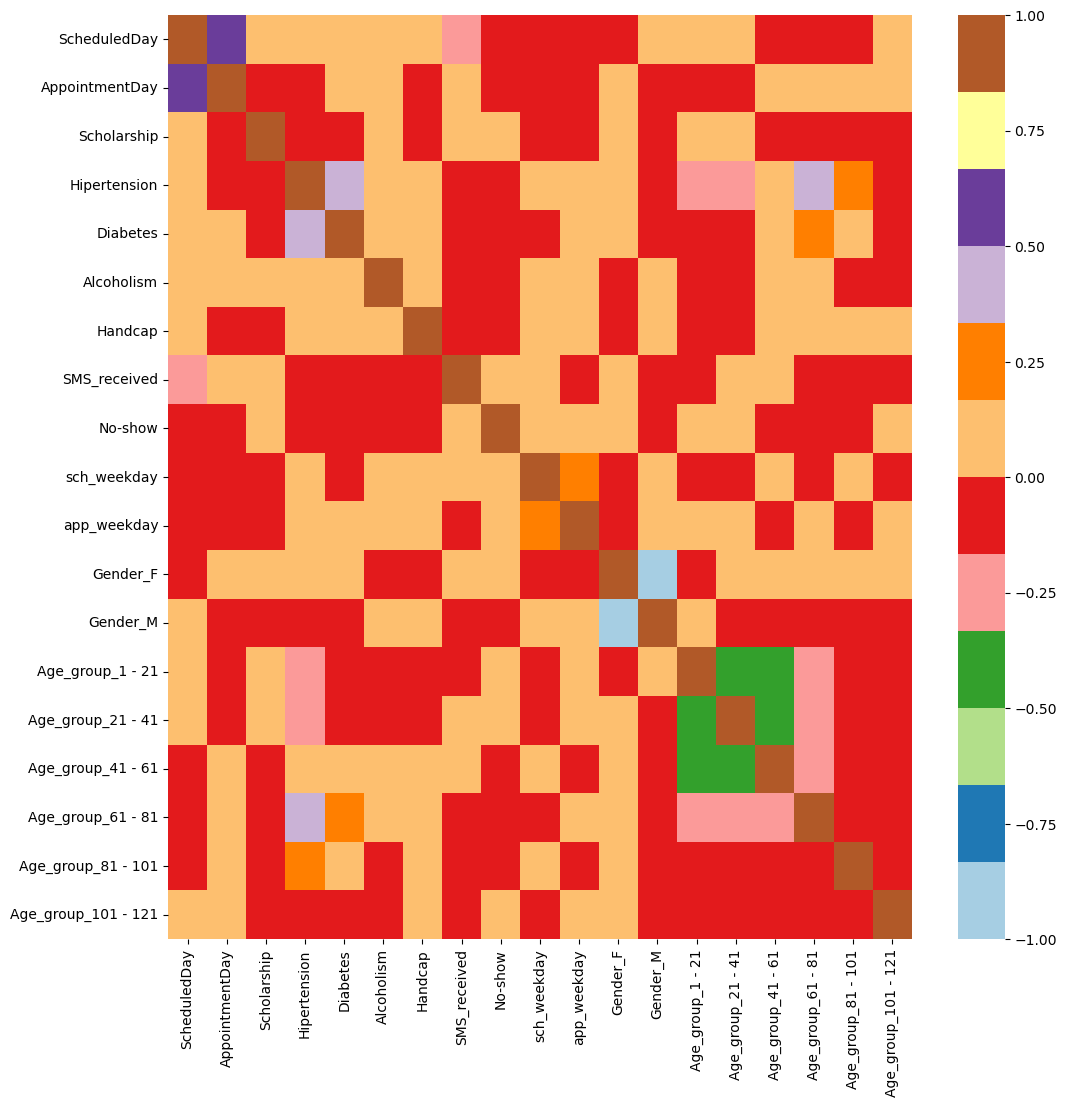

In [54]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")
plt.show()

Bivariate Analysis

In [56]:
new_df1_target0=base_data.loc[base_data["No-show"]==0]
new_df1_target1=base_data.loc[base_data["No-show"]==1]

In [68]:
def uniplot(df, col, title, hue=None):
    # Set plot style and context
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Calculate figure width based on unique values
    width = len(df[col].unique()) + 7
    if hue is not None:
        width += 4 * len(df[hue].unique())  # Use df[hue] to get unique hue values
    fig, ax = plt.subplots(figsize=(width, 8))

    # Create count plot
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')

    # Convert y-axis to 10^4 units
    current_ticks = ax.get_yticks()
    ax.set_yticklabels([f'{tick / 10000:.1f}' for tick in current_ticks])
    
    # Set labels and title
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Show plot
    plt.show()

# Verify DataFrame columns
print(new_df1_target1.columns)
print(new_df1_target1[['Hipertension', 'Gender', 'No-show']].head())

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show', 'sch_weekday', 'app_weekday', 'Age_group'],
      dtype='object')
    Hipertension Gender  No-show
6              0      F        1
7              0      F        1
11             0      M        1
17             0      F        1
20             0      F        1


C:\Users\KGOMOTSO MONGALE\AppData\Local\Temp\ipykernel_14392\371108573.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick / 10000:.1f}' for tick in current_ticks])


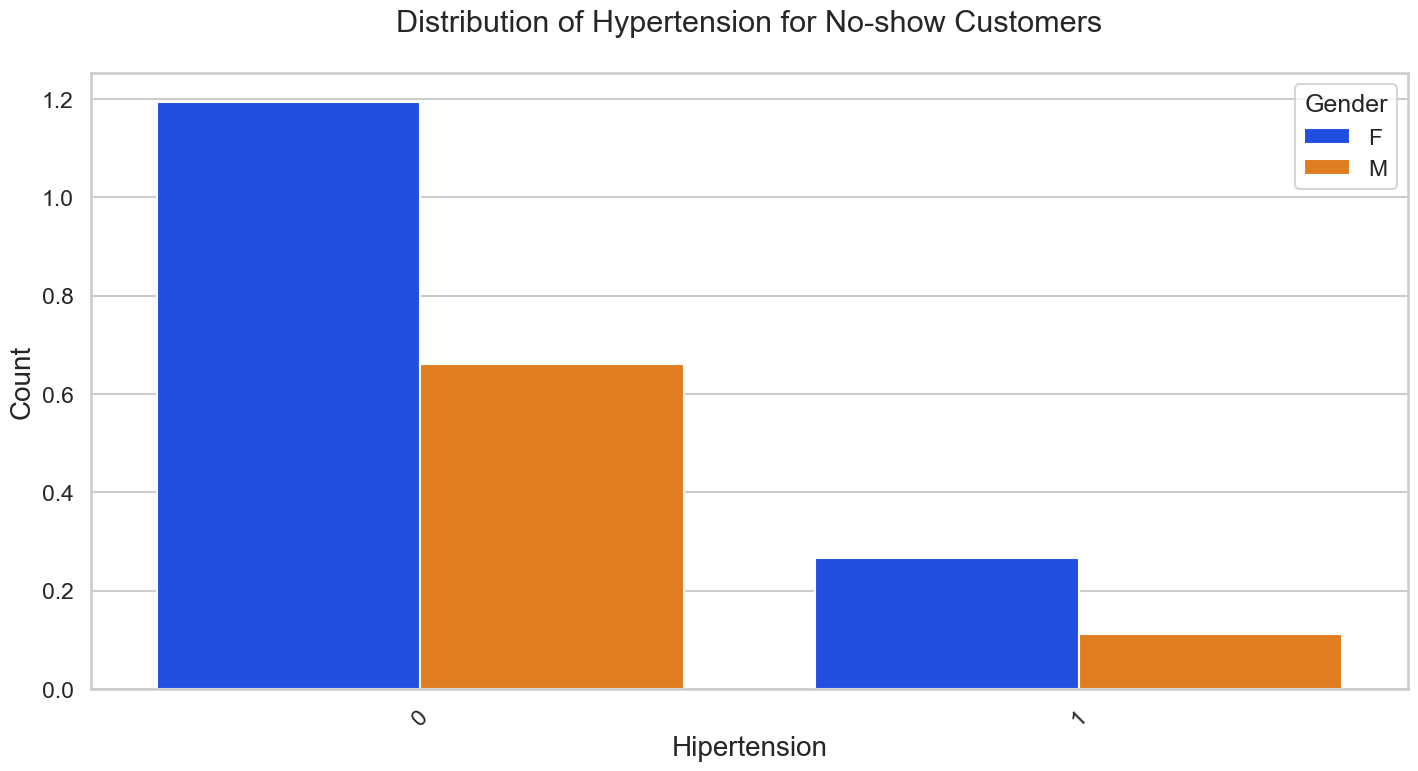

In [69]:
uniplot(new_df1_target1, col='Hipertension', title='Distribution of Hypertension for No-show Customers', hue='Gender')

C:\Users\KGOMOTSO MONGALE\AppData\Local\Temp\ipykernel_14392\371108573.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick / 10000:.1f}' for tick in current_ticks])


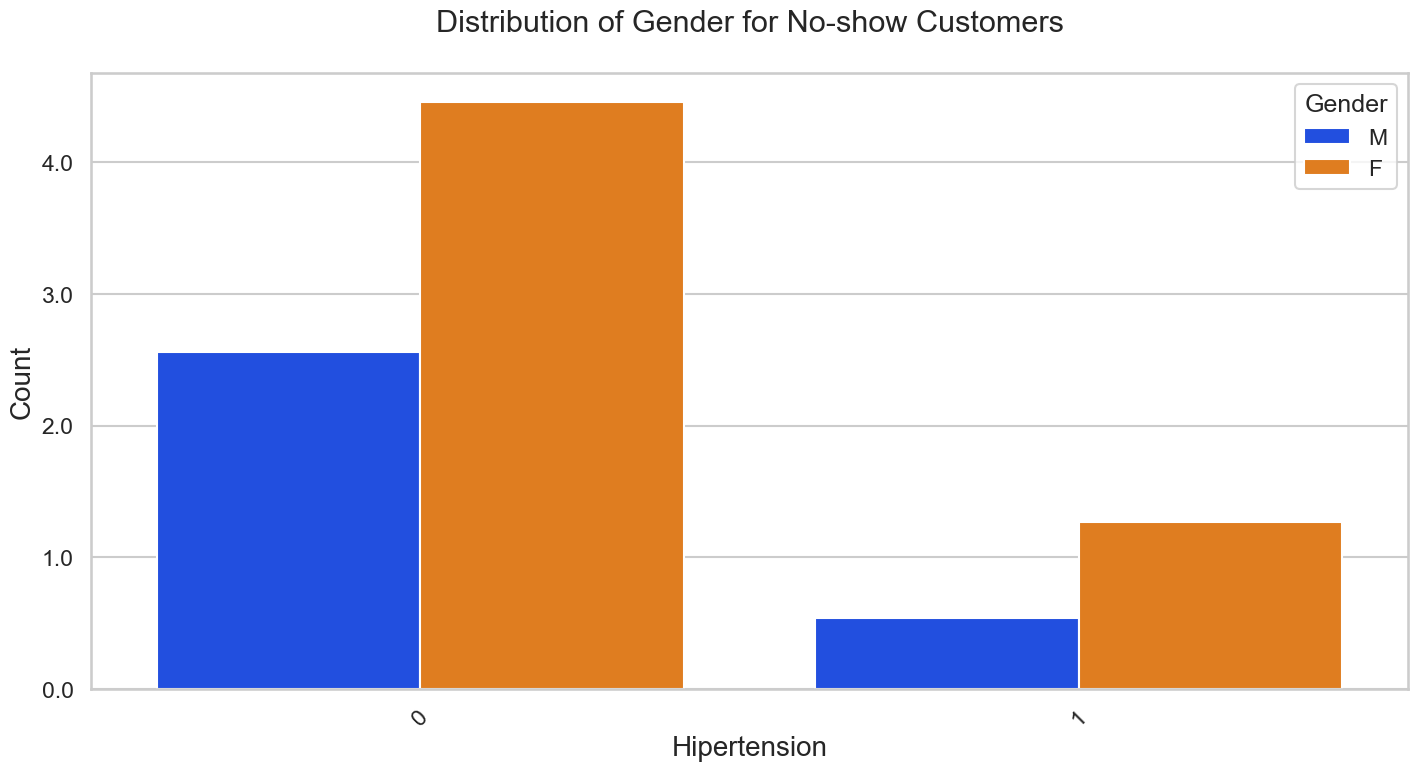

In [70]:
uniplot(new_df1_target0,col='Hipertension',title='Distribution of Gender for No-show Customers',hue='Gender')

C:\Users\KGOMOTSO MONGALE\AppData\Local\Temp\ipykernel_14392\371108573.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick / 10000:.1f}' for tick in current_ticks])


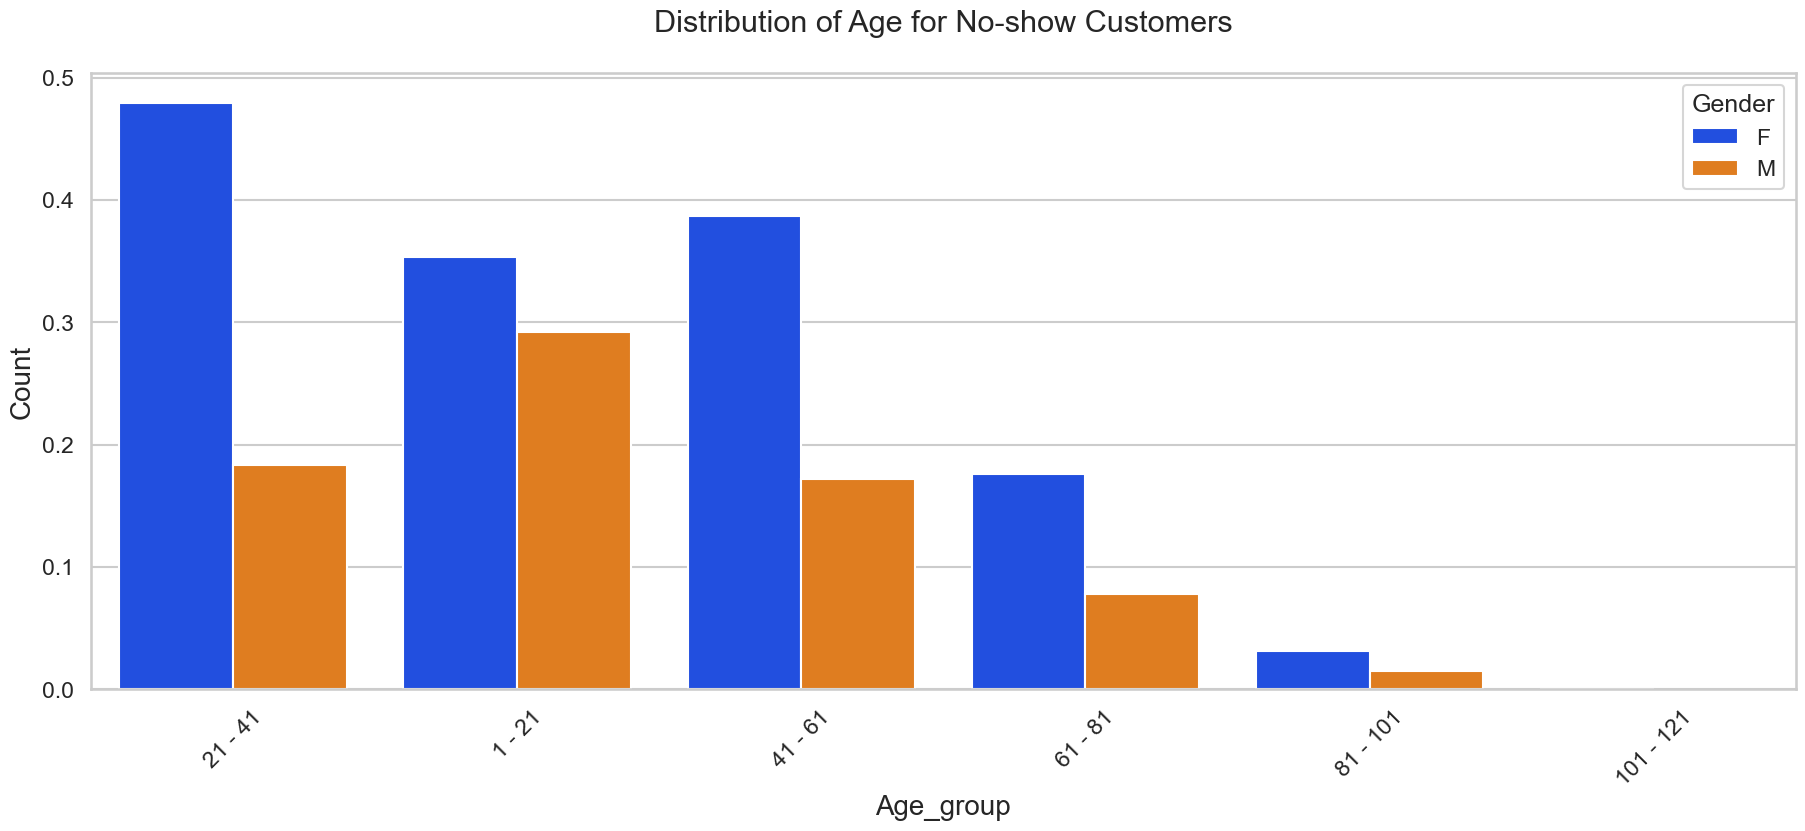

In [71]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for No-show Customers',hue='Gender')

C:\Users\KGOMOTSO MONGALE\AppData\Local\Temp\ipykernel_14392\371108573.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{tick / 10000:.1f}' for tick in current_ticks])


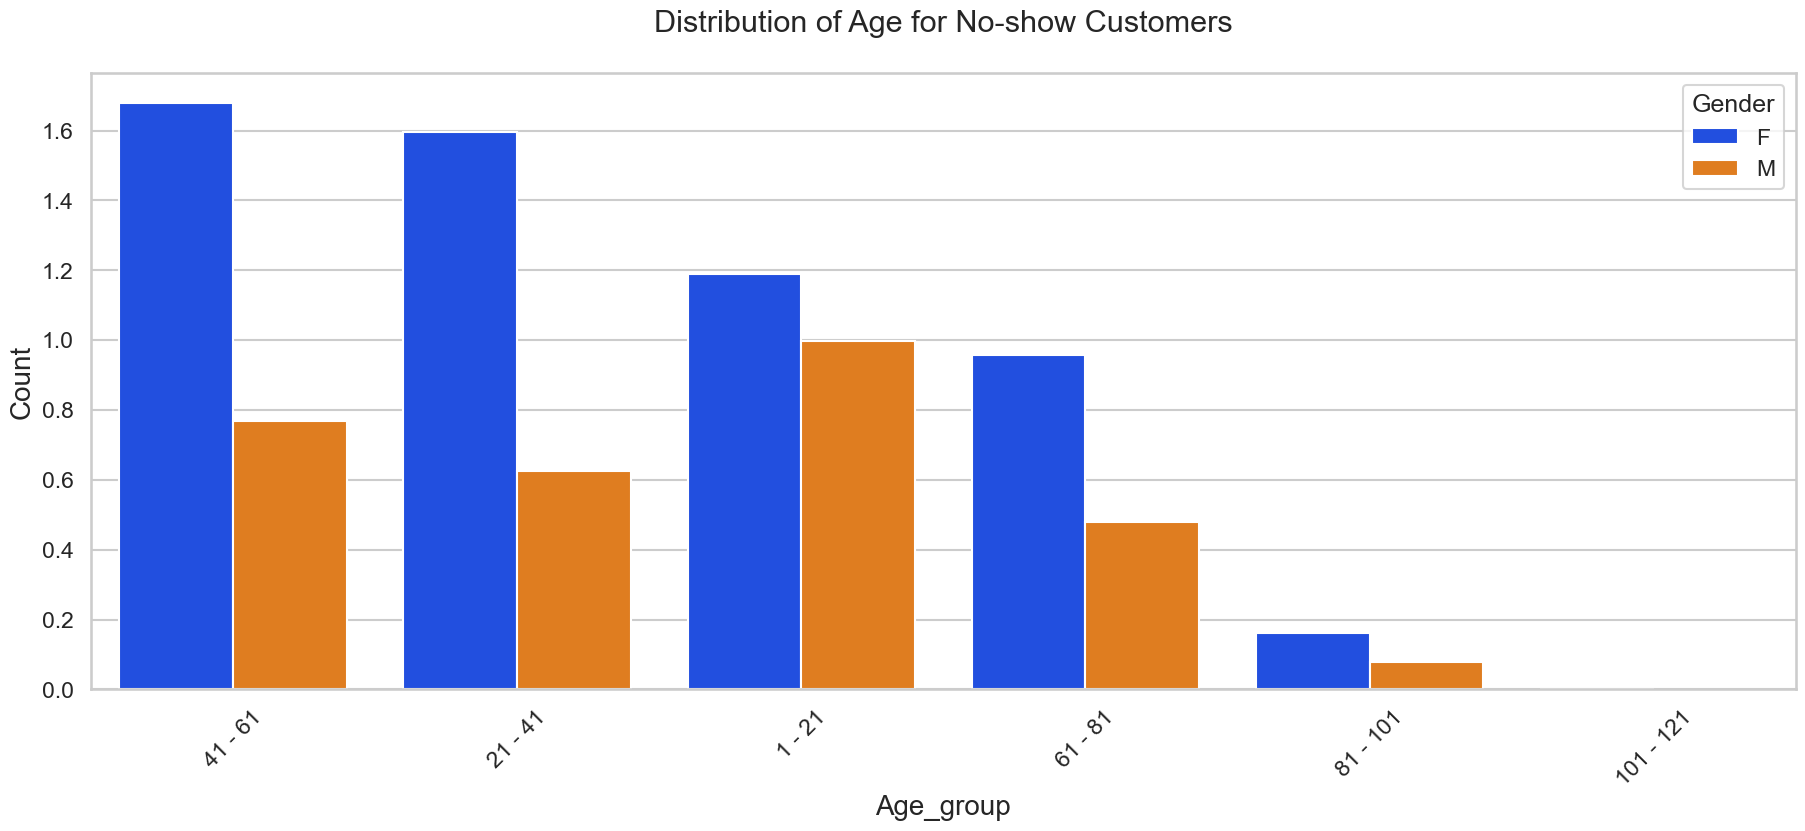

In [72]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for No-show Customers',hue='Gender')

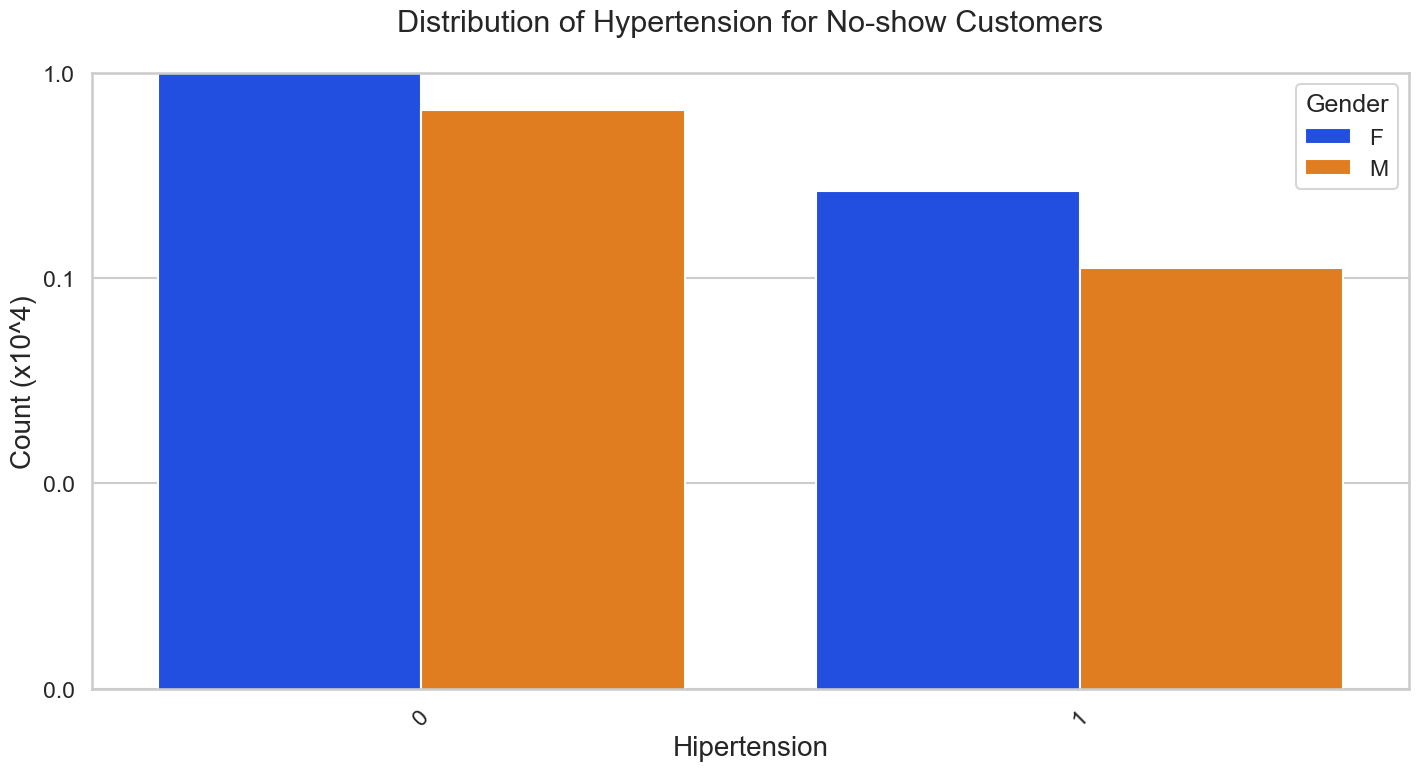

In [74]:
# Call the function
uniplot(new_df1_target1, col='Hipertension', title='Distribution of Hypertension for No-show Customers', hue='Gender')